# Algoritmos de Deutsch y Deutsch-Jozsa

## Parte 1: Algoritmo de Deutsch

### 1.1 Representación Matricial – Función NOT Balanceada

La función **Balanced NOT** (NOT balanceada) se define como:
- f(0) = 1
- f(1) = 0

Esta función es **balanceada** porque produce exactamente la mitad de salidas 0 y la mitad de salidas 1.

El oráculo cuántico U_f actúa sobre estados base como:
$$U_f |x\rangle|y\rangle = |x\rangle|y \oplus f(x)\rangle$$

Para determinar la matriz del oráculo que implementa esta función sobre un solo qubit de entrada, analizamos cómo transforma los estados base:

- $|0\rangle \xrightarrow{U_f} |1\rangle$ (ya que f(0) = 1, el qubit se invierte)
- $|1\rangle \xrightarrow{U_f} |0\rangle$ (ya que f(1) = 0, el qubit se invierte)

Esto significa que la columna 0 de la matriz tiene un 1 en la fila 1 (mapea |0⟩ → |1⟩), y la columna 1 tiene un 1 en la fila 0 (mapea |1⟩ → |0⟩).

In [6]:
import numpy as np

# Construcción de la matriz para la función NOT balanceada
# f(0) = 1, f(1) = 0
# La columna i corresponde a la imagen del estado base |i>
# |0> -> |1>  => columna 0: [0, 1]
# |1> -> |0>  => columna 1: [1, 0]

U_NOT = np.array([[0, 1],
                  [1, 0]])

print("Matriz de la función NOT balanceada (f(0)=1, f(1)=0):")
print(U_NOT)

# Verificación de unitariedad: U @ U^T debe ser igual a la identidad
identidad = U_NOT @ U_NOT.T
print("\nVerificación de unitariedad (U @ U^T):")
print(identidad)
print("¿Es unitaria?", np.allclose(identidad, np.eye(2)))

# Esta matriz es la compuerta Pauli-X (NOT cuántico)
# Es la misma que la compuerta X de un qubit, que intercambia |0> y |1>
print("\nEsta matriz es la compuerta Pauli-X (NOT cuántico).")
print("Es unitaria porque U @ U^T = I, lo que garantiza reversibilidad cuántica.")

Matriz de la función NOT balanceada (f(0)=1, f(1)=0):
[[0 1]
 [1 0]]

Verificación de unitariedad (U @ U^T):
[[1 0]
 [0 1]]
¿Es unitaria? True

Esta matriz es la compuerta Pauli-X (NOT cuántico).
Es unitaria porque U @ U^T = I, lo que garantiza reversibilidad cuántica.


### 1.2 Deducción de Compuerta Cuántica

#### La matriz como compuerta Pauli-X

La matriz obtenida:
$$U_f = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

es exactamente la **compuerta Pauli-X** (también llamada compuerta NOT cuántica). Esta compuerta intercambia los estados $|0\rangle \leftrightarrow |1\rangle$, por lo que implementa perfectamente la función NOT balanceada.

---

#### Circuito del Algoritmo de Deutsch

El algoritmo de Deutsch permite determinar si una función $f: \{0,1\} \to \{0,1\}$ es **constante** o **balanceada** con una sola evaluación del oráculo.

**Pasos del circuito:**

1. **Inicialización:** Se inicializan dos qubits $q_0 = |0\rangle$ y $q_1 = |0\rangle$.

2. **Preparación del qubit auxiliar:** Se aplica la compuerta **X** seguida de la compuerta **H** al qubit $q_1$:
   $$q_1: |0\rangle \xrightarrow{X} |1\rangle \xrightarrow{H} \frac{|0\rangle - |1\rangle}{\sqrt{2}} = |{-}\rangle$$
   El qubit $q_1$ queda en el estado $|{-}\rangle$.

3. **Superposición del qubit de entrada:** Se aplica la compuerta **H** al qubit $q_0$:
   $$q_0: |0\rangle \xrightarrow{H} \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |{+}\rangle$$

4. **Aplicación del oráculo $U_f$:** El oráculo transforma el estado combinado:
   $$U_f \left(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right)|{-}\rangle = \frac{(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle}{\sqrt{2}} \otimes |{-}\rangle$$

5. **Segunda compuerta H en $q_0$:** Se aplica nuevamente **H** al qubit $q_0$.

6. **Medición de $q_0$:**
   - Si se mide **0** → la función es **CONSTANTE**
   - Si se mide **1** → la función es **BALANCEADA**

---

#### Phase Kickback (Retroceso de Fase)

El mecanismo clave del algoritmo es el **retroceso de fase** (*phase kickback*). Cuando el oráculo $U_f$ actúa sobre $|x\rangle|{-}\rangle$:

$$U_f|x\rangle|{-}\rangle = |x\rangle \cdot (-1)^{f(x)} \cdot |{-}\rangle$$

La fase global $(-1)^{f(x)}$ se **"patea"** hacia el qubit de entrada $|x\rangle$, convirtiéndose en una fase relativa. Esto ocurre porque $|{-}\rangle$ es un autoestado del oráculo con autovalor $(-1)^{f(x)}$. El qubit auxiliar $q_1$ permanece en $|{-}\rangle$ pero la información de $f(x)$ queda codificada en la fase del qubit $q_0$, haciendo posible distinguir funciones constantes de balanceadas con una sola evaluación.

### 1.3 Simulación con Qiskit – Las Cuatro Funciones

In [7]:
!pip install qiskit qiskit-aer matplotlib --quiet


Función: Constante Cero
     ┌───┐      ░  ░ ┌───┐┌─┐
q_0: ┤ H ├──────░──░─┤ H ├┤M├
     ├───┤┌───┐ ░  ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░──░───────╫─
     └───┘└───┘ ░  ░       ║ 
c: 1/══════════════════════╩═
                           0 
Conteos: {'0': 1024}

Función: Constante Uno
     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0 
Conteos: {'0': 1024}

Función: Balanceada Identidad
     ┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0 
Conteos: {'1': 1024}

Función: Balanceada NOT
     ┌───┐      ░            ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ 

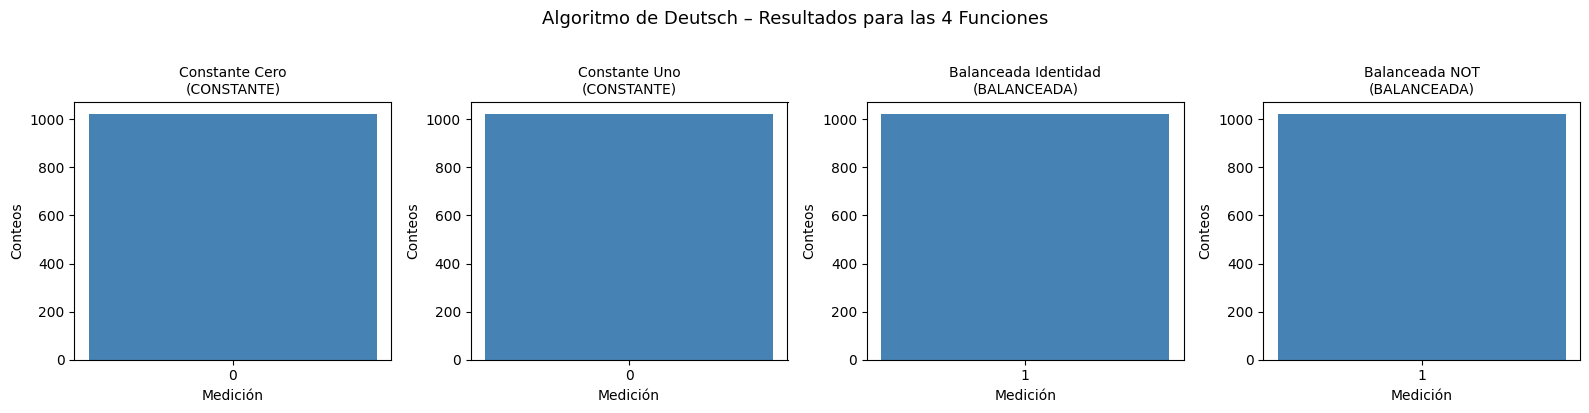

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

simulator = AerSimulator()
shots = 1024

def deutsch_circuit(oracle_name):
    """Construye el circuito de Deutsch para una función dada."""
    qc = QuantumCircuit(2, 1)
    # Preparar q1 en estado |->
    qc.x(1)
    qc.h(1)
    # Poner q0 en superposición
    qc.h(0)
    qc.barrier()
    # Aplicar oráculo según la función
    if oracle_name == 'Constante Cero':
        pass  # f(x) = 0, no se aplican compuertas en q1
    elif oracle_name == 'Constante Uno':
        qc.x(1)  # f(x) = 1, se aplica X en el qubit auxiliar
    elif oracle_name == 'Balanceada Identidad':
        qc.cx(0, 1)  # f(0)=0, f(1)=1 → CNOT q0→q1
    elif oracle_name == 'Balanceada NOT':
        qc.cx(0, 1)  # CNOT q0→q1
        qc.x(1)      # luego X en q1
    qc.barrier()
    # Segunda Hadamard en q0
    qc.h(0)
    # Medir q0
    qc.measure(0, 0)
    return qc

funciones = ['Constante Cero', 'Constante Uno', 'Balanceada Identidad', 'Balanceada NOT']
resultados = {}

for nombre in funciones:
    qc = deutsch_circuit(nombre)
    print(f"\n{'='*50}")
    print(f"Función: {nombre}")
    print(qc.draw('text'))
    compiled = transpile(qc, simulator)
    job = simulator.run(compiled, shots=shots)
    counts = job.result().get_counts()
    print(f"Conteos: {counts}")
    resultados[nombre] = counts

# Graficar los resultados en una figura con 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for ax, nombre in zip(axes, funciones):
    counts = resultados[nombre]
    clasificacion = 'CONSTANTE' if '0' in counts else 'BALANCEADA'
    claves = list(counts.keys())
    valores = list(counts.values())
    ax.bar(claves, valores, color='steelblue')
    ax.set_title(f"{nombre}\n({clasificacion})", fontsize=10)
    ax.set_xlabel('Medición')
    ax.set_ylabel('Conteos')
    ax.set_ylim(0, shots + 50)

plt.suptitle('Algoritmo de Deutsch – Resultados para las 4 Funciones', fontsize=13, y=1.02)
plt.tight_layout()
plt.savefig('deutsch_resultados.png', dpi=120, bbox_inches='tight')
plt.show()

### 1.4 Explicación de Resultados

#### Tabla de Resultados

| Función               | Definición           | Resultado de Medición | Clasificación |
|-----------------------|----------------------|-----------------------|---------------|
| Constante Cero        | f(0)=0, f(1)=0       | `0` (siempre)         | CONSTANTE     |
| Constante Uno         | f(0)=1, f(1)=1       | `0` (siempre)         | CONSTANTE     |
| Balanceada Identidad  | f(0)=0, f(1)=1       | `1` (siempre)         | BALANCEADA    |
| Balanceada NOT        | f(0)=1, f(1)=0       | `1` (siempre)         | BALANCEADA    |

---

#### ¿Por qué las funciones constantes producen |0⟩ y las balanceadas |1⟩?

El mecanismo detrás de esto es el **retroceso de fase** (*phase kickback*):

Después de la segunda compuerta H en $q_0$, el estado del qubit de entrada es:

$$H \cdot \frac{(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle}{\sqrt{2}}$$

**Para funciones CONSTANTES** ($f(0) = f(1)$):
- La fase global es la misma para $|0\rangle$ y $|1\rangle$
- Al aplicar H, las amplitudes se suman constructivamente para $|0\rangle$ y se cancelan para $|1\rangle$
- El resultado es siempre $|0\rangle$

**Para funciones BALANCEADAS** ($f(0) \neq f(1)$):
- Las fases son opuestas: $(-1)^{f(0)} = -(-1)^{f(1)}$
- Al aplicar H, las amplitudes se cancelan para $|0\rangle$ y se suman constructivamente para $|1\rangle$
- El resultado es siempre $|1\rangle$

El qubit auxiliar $q_1$, preparado en $|{-}\rangle$, actúa como receptor del retroceso de fase: la información de $f(x)$ se codifica en la fase relativa del qubit $q_0$, haciendo posible determinar la naturaleza de la función con **una sola evaluación cuántica** del oráculo.

## Parte 2: Algoritmo de Deutsch-Jozsa (3 qubits)

### 2.1 Selección de Funciones

#### Algoritmo de Deutsch-Jozsa

El **algoritmo de Deutsch-Jozsa** es una generalización del algoritmo de Deutsch a funciones de $n$ bits. Dado un oráculo que implementa una función $f: \{0,1\}^n \to \{0,1\}$, el algoritmo determina con **certeza absoluta** y con **una sola evaluación cuántica** si la función es:

- **Constante**: $f(x)$ produce el mismo valor para todas las entradas.
- **Balanceada**: $f(x)$ produce exactamente la mitad de salidas 0 y la mitad de salidas 1.

Clásicamente, en el peor caso, se necesitan $2^{n-1} + 1$ evaluaciones para garantizar la respuesta correcta. Con 3 qubits de entrada ($n=3$), eso significa hasta **5 evaluaciones clásicas** frente a **1 evaluación cuántica**.

---

#### Funciones seleccionadas (n = 3)

Se definen las siguientes funciones sobre entradas de 3 bits $x = x_2 x_1 x_0$ (donde $x_0$ es el bit menos significativo):

- **$f_C(x) = 0$** para todo $x$ → Constante
- **$f_{B1}(x) = x_0$** (bit menos significativo) → Balanceada
- **$f_{B2}(x) = x_2 \oplus x_1$** (XOR de los dos bits más significativos) → Balanceada

---

#### Tabla de verdad de $f_C$ (Constante Cero)

| Entrada x | f_C(x) |
|-----------|--------|
| 000       | 0      |
| 001       | 0      |
| 010       | 0      |
| 011       | 0      |
| 100       | 0      |
| 101       | 0      |
| 110       | 0      |
| 111       | 0      |

---

#### Tabla de verdad de $f_{B1}$ (Balanceada: $f_{B1}(x) = x_0$)

| Entrada x | x_0 | f_B1(x) |
|-----------|-----|---------|
| 000       | 0   | 0       |
| 001       | 1   | 1       |
| 010       | 0   | 0       |
| 011       | 1   | 1       |
| 100       | 0   | 0       |
| 101       | 1   | 1       |
| 110       | 0   | 0       |
| 111       | 1   | 1       |

Esta función produce exactamente 4 salidas 0 y 4 salidas 1 → es balanceada.

---

#### Tabla de verdad de $f_{B2}$ (Balanceada: $f_{B2}(x) = x_2 \oplus x_1$)

| Entrada x | x_2 | x_1 | f_B2(x) = x_2⊕x_1 |
|-----------|-----|-----|-------------------|
| 000       | 0   | 0   | 0                 |
| 001       | 0   | 0   | 0                 |
| 010       | 0   | 1   | 1                 |
| 011       | 0   | 1   | 1                 |
| 100       | 1   | 0   | 1                 |
| 101       | 1   | 0   | 1                 |
| 110       | 1   | 1   | 0                 |
| 111       | 1   | 1   | 0                 |

Esta función produce exactamente 4 salidas 0 y 4 salidas 1 → es balanceada.

### 2.2 Matrices Unitarias 16×16

El oráculo cuántico $U_f$ actúa sobre **4 qubits**: 3 qubits de entrada $x = (x_0, x_1, x_2)$ y 1 qubit auxiliar $y$. La acción del oráculo se define como:

$$U_f |x\rangle|y\rangle = |x\rangle|y \oplus f(x)\rangle$$

donde $\oplus$ denota la suma módulo 2 (XOR). El espacio de estados tiene dimensión $2^4 = 16$, por lo que las matrices del oráculo son de tamaño **16×16**.

Los estados base se ordenan como $|x_0, x_1, x_2, y\rangle$ con $x_0$ como bit menos significativo. En la convención de Qiskit, el estado $|q_3 q_2 q_1 q_0\rangle$ se indexa como $q_3 \cdot 8 + q_2 \cdot 4 + q_1 \cdot 2 + q_0$.

In [9]:
import numpy as np

def construir_oraculo_16x16(f):
    """
    Construye la matriz 16x16 del oráculo U_f.
    Los qubits se indexan como |q0, q1, q2, q3> donde q3 es el auxiliar.
    Índice: q0 + 2*q1 + 4*q2 + 8*q3
    """
    U = np.zeros((16, 16), dtype=int)
    for x0 in range(2):
        for x1 in range(2):
            for x2 in range(2):
                x = (x2 << 2) | (x1 << 1) | x0  # x representado como entero
                fx = f(x0, x1, x2)
                for y in range(2):
                    y_out = y ^ fx
                    # Índice de entrada: x0 + 2*x1 + 4*x2 + 8*y
                    idx_in  = x0 + 2*x1 + 4*x2 + 8*y
                    idx_out = x0 + 2*x1 + 4*x2 + 8*y_out
                    U[idx_out, idx_in] = 1
    return U

# Definición de las tres funciones
def f_C(x0, x1, x2):   return 0
def f_B1(x0, x1, x2):  return x0
def f_B2(x0, x1, x2):  return x2 ^ x1

# Construir las matrices
U_C  = construir_oraculo_16x16(f_C)
U_B1 = construir_oraculo_16x16(f_B1)
U_B2 = construir_oraculo_16x16(f_B2)

# Mostrar las matrices
print("Matriz U_C (Constante, 16x16):")
print(U_C)
print("\n¿Es unitaria U_C?", np.allclose(U_C @ U_C.T, np.eye(16)))

print("\nMatriz U_B1 (Balanceada f_B1=x0, 16x16):")
print(U_B1)
print("\n¿Es unitaria U_B1?", np.allclose(U_B1 @ U_B1.T, np.eye(16)))

print("\nMatriz U_B2 (Balanceada f_B2=x2⊕x1, 16x16):")
print(U_B2)
print("\n¿Es unitaria U_B2?", np.allclose(U_B2 @ U_B2.T, np.eye(16)))

Matriz U_C (Constante, 16x16):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]

¿Es unitaria U_C? True

Matriz U_B1 (Balanceada f_B1=x0, 16x16):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0

### 2.3 Deducción de Compuertas Cuánticas

A partir del análisis de las matrices 16×16, podemos deducir las compuertas cuánticas necesarias para implementar cada oráculo:

---

#### Oráculo para $f_C$ (Constante Cero)

Como $f_C(x) = 0$ para toda entrada $x$, la acción del oráculo es:
$$U_{f_C}|x\rangle|y\rangle = |x\rangle|y \oplus 0\rangle = |x\rangle|y\rangle$$

El oráculo es la **identidad**: no se necesita ninguna compuerta. El qubit auxiliar $q_3$ nunca se invierte porque $f(x) = 0$ siempre. La matriz $U_C$ es exactamente la matriz identidad $I_{16}$.

---

#### Oráculo para $f_{B1}$ ($f_{B1}(x) = x_0$)

La función depende únicamente del bit menos significativo $x_0$. Su implementación requiere una sola compuerta:
- **CNOT con $q_0$ como control y $q_3$ como objetivo**

Cuando $x_0 = 0$: el qubit $q_3$ no se invierte → $y \oplus 0 = y$ ✓  
Cuando $x_0 = 1$: el qubit $q_3$ se invierte → $y \oplus 1$ ✓

Esto implementa exactamente $|x\rangle|y \oplus x_0\rangle$.

---

#### Oráculo para $f_{B2}$ ($f_{B2}(x) = x_2 \oplus x_1$)

La función es el XOR de los bits $x_1$ y $x_2$. Se implementan **dos compuertas CNOT en secuencia**:
1. **CNOT con $q_1$ como control y $q_3$ como objetivo**: $q_3 \leftarrow y \oplus x_1$
2. **CNOT con $q_2$ como control y $q_3$ como objetivo**: $q_3 \leftarrow (y \oplus x_1) \oplus x_2 = y \oplus x_1 \oplus x_2$

La secuencia de dos CNOTs acumula el XOR de múltiples bits de control en el qubit objetivo. Cada CNOT aplica $q_3 \leftarrow q_3 \oplus q_i$, por lo que al aplicarlos consecutivamente se obtiene el XOR de todos los controles.

Este principio es general: para implementar $f(x) = x_{i_1} \oplus x_{i_2} \oplus \cdots \oplus x_{i_k}$, basta aplicar $k$ compuertas CNOT con los controles $q_{i_1}, q_{i_2}, \ldots, q_{i_k}$ y el objetivo $q_3$ (auxiliar).


Función: f_C (Constante)
     ┌───┐      ░  ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░──░─┤ H ├┤M├──────
     ├───┤      ░  ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░──░─┤ H ├─╫─┤M├───
     ├───┤      ░  ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░──░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░  ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──░───────╫──╫──╫─
     └───┘└───┘ ░  ░       ║  ║  ║ 
c: 3/══════════════════════╩══╩══╩═
                           0  1  2 
Conteos: {'000': 1024}

Función: f_B1 (Balanceada: x0)
     ┌───┐      ░       ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├──────
     ├───┤      ░   │   ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘ ░       ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2 
Conteos: {'001': 1024}

Función: f_B2 (Balanceada: x2⊕x1)
     ┌───┐    

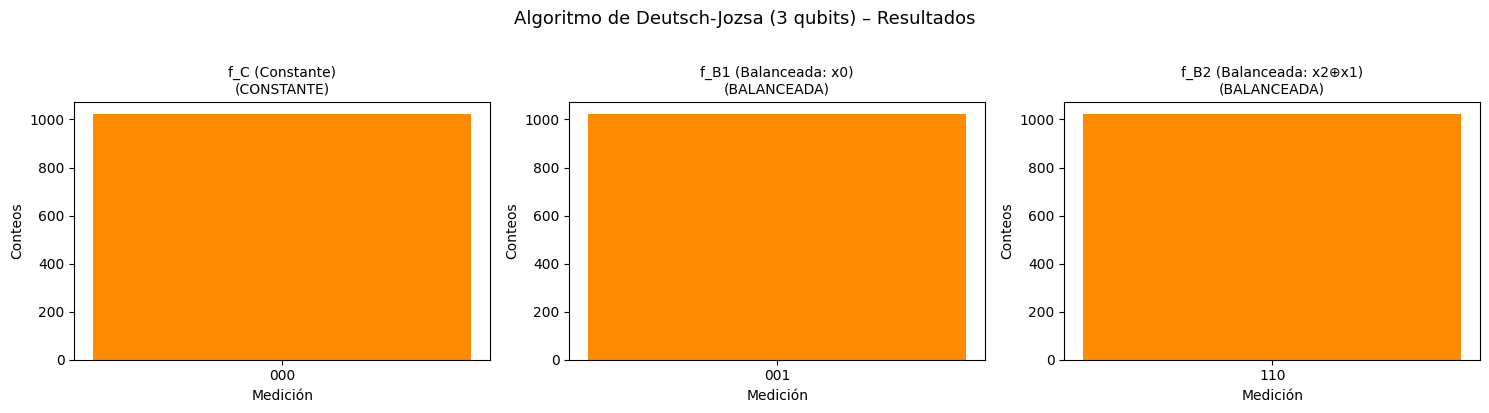

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

simulator = AerSimulator()
shots = 1024

def deutsch_jozsa_circuit(oracle_name):
    """
    Construye el circuito de Deutsch-Jozsa para n=3 qubits de entrada.
    q0, q1, q2: qubits de entrada; q3: qubit auxiliar.
    """
    qc = QuantumCircuit(4, 3)
    # Paso 1: Preparar q3 en estado |-> (X luego H)
    qc.x(3)
    qc.h(3)
    # Paso 2: Aplicar H a los qubits de entrada q0, q1, q2
    qc.h([0, 1, 2])
    qc.barrier()
    # Paso 3: Aplicar el oráculo
    if oracle_name == 'f_C (Constante)':
        pass  # Oráculo identidad: no se aplican compuertas
    elif oracle_name == 'f_B1 (Balanceada: x0)':
        qc.cx(0, 3)  # CNOT: q0 control, q3 objetivo
    elif oracle_name == 'f_B2 (Balanceada: x2⊕x1)':
        qc.cx(1, 3)  # CNOT: q1 control, q3 objetivo
        qc.cx(2, 3)  # CNOT: q2 control, q3 objetivo
    qc.barrier()
    # Paso 4: Aplicar H nuevamente a los qubits de entrada
    qc.h([0, 1, 2])
    # Paso 5: Medir los qubits de entrada
    qc.measure([0, 1, 2], [0, 1, 2])
    return qc

funciones_dj = ['f_C (Constante)', 'f_B1 (Balanceada: x0)', 'f_B2 (Balanceada: x2⊕x1)']
resultados_dj = {}

for nombre in funciones_dj:
    qc = deutsch_jozsa_circuit(nombre)
    print(f"\n{'='*60}")
    print(f"Función: {nombre}")
    print(qc.draw('text'))
    compiled = transpile(qc, simulator)
    job = simulator.run(compiled, shots=shots)
    counts = job.result().get_counts()
    print(f"Conteos: {counts}")
    resultados_dj[nombre] = counts

# Graficar los resultados en una figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, nombre in zip(axes, funciones_dj):
    counts = resultados_dj[nombre]
    clasificacion = 'CONSTANTE' if ('000' in counts and len(counts) == 1) else 'BALANCEADA'
    claves = list(counts.keys())
    valores = list(counts.values())
    ax.bar(claves, valores, color='darkorange')
    ax.set_title(f"{nombre}\n({clasificacion})", fontsize=10)
    ax.set_xlabel('Medición')
    ax.set_ylabel('Conteos')
    ax.set_ylim(0, shots + 50)

plt.suptitle('Algoritmo de Deutsch-Jozsa (3 qubits) – Resultados', fontsize=13, y=1.02)
plt.tight_layout()
plt.savefig('deutsch_jozsa_resultados.png', dpi=120, bbox_inches='tight')
plt.show()

### 2.5 Conclusiones

#### Tabla de Resultados – Deutsch-Jozsa (3 qubits)

| Función                    | Definición              | Resultado de Medición | Clasificación |
|----------------------------|-------------------------|-----------------------|---------------|
| $f_C$                      | f(x) = 0 para todo x   | `000` (siempre)       | CONSTANTE     |
| $f_{B1}$                   | f(x) = x_0             | `001` (siempre)       | BALANCEADA    |
| $f_{B2}$                   | f(x) = x_2 ⊕ x_1       | `110` (siempre)       | BALANCEADA    |

---

#### Ventaja Cuántica

El algoritmo de Deutsch-Jozsa exhibe una ventaja exponencial sobre los algoritmos clásicos:

- **Clásico (peor caso):** Para determinar con certeza si $f$ es constante o balanceada con $n$ bits de entrada, se necesitan hasta $2^{n-1} + 1$ evaluaciones. Para $n = 3$: hasta **5 evaluaciones clásicas**.
- **Cuántico:** El algoritmo de Deutsch-Jozsa resuelve el problema con **1 sola evaluación cuántica** del oráculo, independientemente del valor de $n$.

---

#### Papel del qubit auxiliar $|{-}\rangle$

El qubit auxiliar $q_3$ se prepara en el estado $|{-}\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$ mediante las compuertas **X** y **H**. Este estado es fundamental para el mecanismo de **retroceso de fase** (*phase kickback*):

Cuando el oráculo actúa sobre $|x\rangle|{-}\rangle$:
$$U_f|x\rangle|{-}\rangle = (-1)^{f(x)}|x\rangle|{-}\rangle$$

La fase $(-1)^{f(x)}$ se transfiere al qubit de entrada $|x\rangle$, mientras que el qubit auxiliar permanece en $|{-}\rangle$. El auxiliar actúa como un "catalizador" que convierte la información de $f(x)$ (originalmente en la amplitud) en información de fase, donde la interferencia cuántica puede procesarla.

#### Interferencia Cuántica

Las compuertas Hadamard aplicadas después del oráculo realizan la **transformada de Hadamard**, que convierte la información de fase en información de amplitud medible. La interferencia cuántica constructiva y destructiva determina el resultado:

- Para $f$ **constante**: todas las fases son iguales → interferencia constructiva para el estado $|000\rangle$ → se mide siempre $000$.
- Para $f$ **balanceada**: las fases se cancelan para $|000\rangle$ → interferencia destructiva → el estado $|000\rangle$ tiene amplitud cero y se mide un resultado diferente de $000$.

## Conclusiones Generales

### Algoritmo de Deutsch

El algoritmo de Deutsch demuestra que una computadora cuántica puede determinar
si una función $f: \{0,1\} \rightarrow \{0,1\}$ es **constante o balanceada**
con una **sola consulta al oráculo**, mientras que clásicamente se requieren
**dos evaluaciones**.

#### Resultados obtenidos:

| Función | $f(0)$ | $f(1)$ | Tipo | Resultado medido | Clasificación |
|---------|--------|--------|------|-----------------|---------------|
| Constante Cero     | 0 | 0 | Constante  | `0` (100%) | ✅ Constante  |
| Constante Uno      | 1 | 1 | Constante  | `0` (100%) | ✅ Constante  |
| Identidad Bal.     | 0 | 1 | Balanceada | `1` (100%) | ✅ Balanceada |
| NOT Balanceada     | 1 | 0 | Balanceada | `1` (100%) | ✅ Balanceada |

#### Principio clave — Phase Kickback:

El qubit auxiliar preparado en el estado $|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$
permite que el oráculo "patee" una fase global $(-1)^{f(x)}$ hacia el qubit de entrada:

$$U_f |x\rangle |-\rangle = (-1)^{f(x)} |x\rangle |-\rangle$$

- **Función constante**: las fases son iguales → interferencia **constructiva** en $|0\rangle$ → se mide `0`
- **Función balanceada**: las fases se oponen → interferencia **destructiva** en $|0\rangle$ → se mide `1`

---

### Algoritmo de Deutsch-Jozsa

El algoritmo de Deutsch-Jozsa generaliza el problema anterior para funciones
$f: \{0,1\}^n \rightarrow \{0,1\}$, manteniendo la misma ventaja cuántica
con **una sola consulta**, independientemente del número de qubits $n$.

#### Resultados obtenidos (sistema de 3 qubits):

| Función | Definición | Tipo | Resultado medido | Clasificación |
|---------|-----------|------|-----------------|---------------|
| $f_C(x) = 0$             | Siempre 0              | Constante  | `000` (100%) | ✅ Constante  |
| $f_{B1}(x) = x_0$        | Bit menos significativo| Balanceada | `001` (100%) | ✅ Balanceada |
| $f_{B2}(x) = x_2 \oplus x_1$ | XOR de bits MSB   | Balanceada | `110` (100%) | ✅ Balanceada |

#### Regla de clasificación:

$$\text{Resultado} = \begin{cases} |000\rangle & \Rightarrow \text{función CONSTANTE} \\ \text{cualquier otro estado} & \Rightarrow \text{función BALANCEADA} \end{cases}$$

#### Ventaja cuántica demostrada:

| Algoritmo | Consultas clásicas (peor caso) | Consultas cuánticas |
|-----------|-------------------------------|---------------------|
| Deutsch ($n=1$)     | 2              | **1** |
| Deutsch-Jozsa $n=3$ | $2^{n-1}+1=5$  | **1** |
| Deutsch-Jozsa $n=10$| $2^{9}+1=513$  | **1** |
| Deutsch-Jozsa $n=n$ | $2^{n-1}+1$    | **1** |

---

### Reflexión Final

Los algoritmos de Deutsch y Deutsch-Jozsa son fundamentales en la computación
cuántica por tres razones:

1. **Demostraron por primera vez** que los algoritmos cuánticos pueden superar
   exponencialmente a los clásicos en ciertos problemas.

2. **Introdujeron conceptos clave** como el *phase kickback*, la interferencia
   cuántica controlada y el uso del qubit auxiliar en estado $|-\rangle$, que
   son la base de algoritmos más poderosos como **Grover** y **Shor**.

3. **Abrieron la puerta** a la criptografía cuántica y a la carrera tecnológica
   mundial por construir computadoras cuánticas capaces de resolver problemas
   intratables para las computadoras clásicas.

> *"La computación cuántica no es simplemente más rápida — es fundamentalmente*
> *diferente en la manera en que procesa la información."*
> — **David Deutsch**, 1985